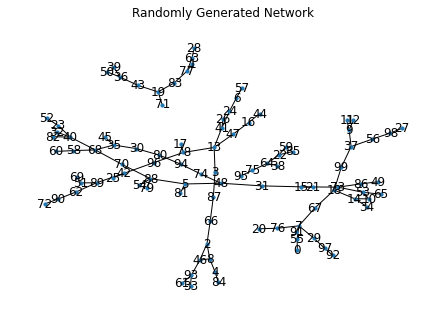

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Generate 300 nodes
num_nodes = 100
nodes = range(num_nodes)

# Step 2: Build connections for each node
G = nx.Graph()

for node in nodes:
    # Randomly select 7 nodes (excluding the focal node)
    neighbors = random.sample(set(nodes) - {node}, 1)
    
    # Add edges to the graph
    edges = [(node, neighbor) for neighbor in neighbors]
    G.add_edges_from(edges)

# Step 3: Visualize the network
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=10)
plt.title("Randomly Generated Network")
plt.show()


In [26]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

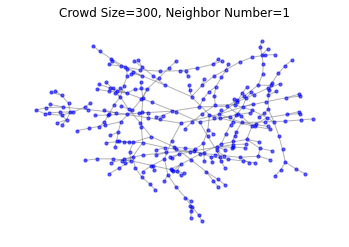

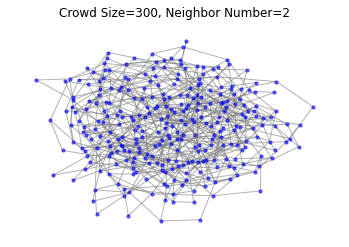

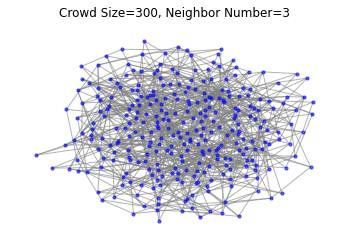

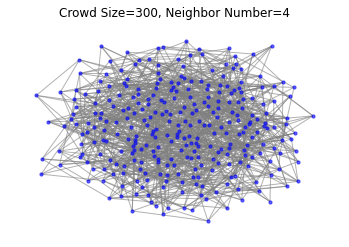

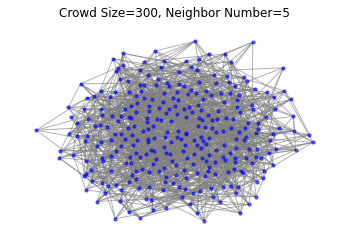

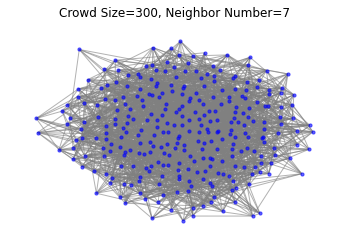

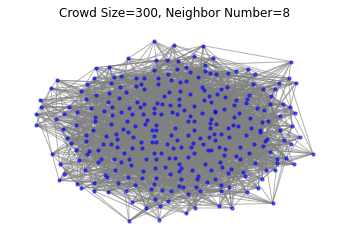

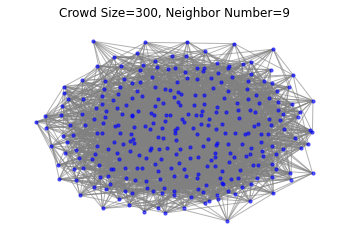

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
data_folder = r"E:\data\dao-0310-23\Topology\DHA"
# Step 1: Generate 300 nodes
num_nodes = 300
num_connects_list = [1, 2, 3, 4, 5, 7, 8, 9]
nodes = range(num_nodes)
for num_connects in num_connects_list:
    ax = plt.subplot()
    # Step 2: Build connections for each node
    G = nx.Graph()
    for node in nodes:
        # Randomly select 7 nodes (excluding the focal node)
        neighbors = random.sample(set(nodes) - {node}, num_connects)
        
        # Add edges to the graph
        edges = [(node, neighbor) for neighbor in neighbors]
        G.add_edges_from(edges)
    
    # Step 3: Visualize the network with circles representing nodes
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
    plt.title("Crowd Size={0}, Neighbor Number={1}".format(num_nodes, num_connects))
    plt.savefig(data_folder + r"\network_across_neighbor_num_{0}.png".format(num_connects), transparent=True, dpi=300)
    plt.show()

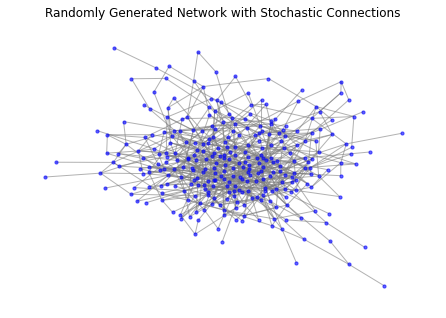

In [10]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import random
# 
# # Step 1: Generate 300 nodes
# num_nodes = 300
# nodes = range(num_nodes)
# 
# # Step 2: Build connections for each node
# G = nx.Graph()
# 
# # List of probabilities for forming 1, 2, 3, 4, and 5 connections
# probabilities = [0.1, 0.05, 0.03, 0.02, 0.02]
# 
# for node in nodes:
#     # Randomly select the number of neighbors based on probabilities
#     num_neighbors = random.choices(range(1, 6), probabilities)[0]
#     
#     # Randomly select nodes (excluding the focal node) based on the chosen number of neighbors
#     neighbors = random.sample(set(nodes) - {node}, num_neighbors)
#     
#     # Add edges to the graph
#     edges = [(node, neighbor) for neighbor in neighbors]
#     G.add_edges_from(edges)
# 
# # Step 3: Visualize the network with circles representing nodes
# pos = nx.spring_layout(G)  # Layout for better visualization
# nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
# plt.title("Randomly Generated Network with Stochastic Connections")
# plt.show()

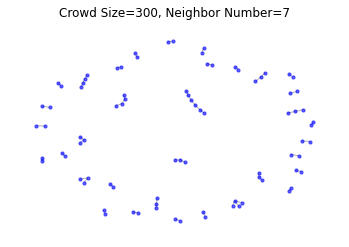

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Generate 300 nodes
num_nodes = 300
nodes = range(num_nodes)
num_connects = 7

# Step 2: Build connections for each node
G = nx.Graph()
ax = plt.subplot()
for node in nodes:
    # Randomly select 7 nodes (excluding the focal node)
    suggested_nodes = random.sample(set(nodes) - {node}, num_connects)
    
    for neighbor in suggested_nodes:
        # Check if the neighbor also suggests the focal node
        if node in random.sample(set(nodes) - {neighbor}, num_connects):
            G.add_edge(node, neighbor)

# Step 3: Visualize the network
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
# plt.title("Network with Bidirectional Connections")
plt.title("Crowd Size={0}, Neighbor Number={1}".format(num_nodes, num_connects))
plt.savefig(data_folder + r"\bidirectional_network_{0}.png".format(num_connects), transparent=True, dpi=300)
plt.show()

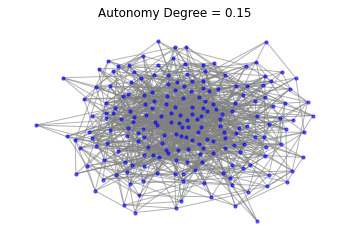

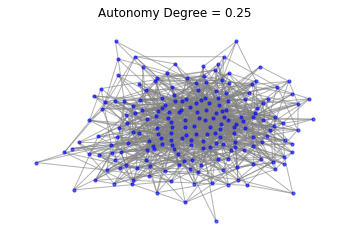

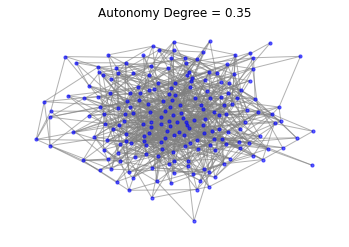

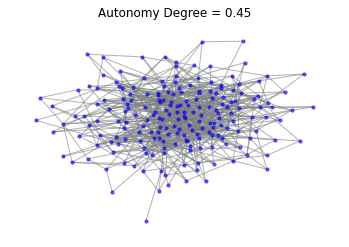

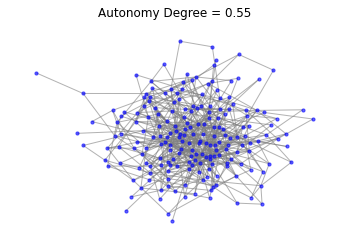

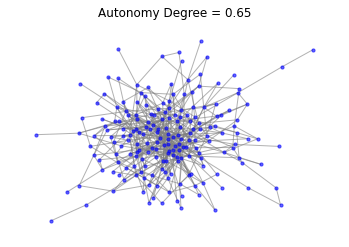

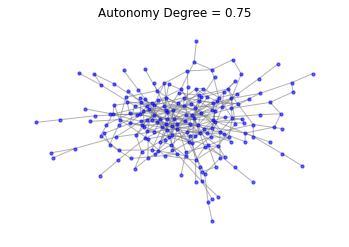

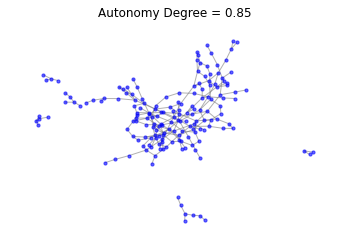

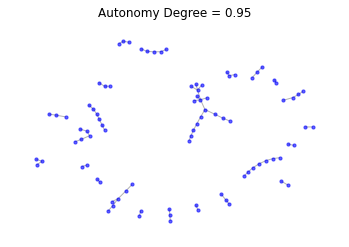

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(100)
# Step 1: Config
num_nodes = 200
num_neighbors = 7
autonomy_prob_list = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
nodes = range(num_nodes)
node_performance = [np.random.uniform(low=0, high=1) for i in range(num_nodes)]
for autonomy_prob in autonomy_prob_list:
    ax = plt.subplot()
    # Step 2: Build connections for each node
    G = nx.Graph()
    for node in nodes:
        # Randomly select 7 superior nodes (excluding the focal node)
        first_superior_nodes = [index for index, performance in zip(nodes, node_performance) if performance >= node_performance[node]]
        if len(first_superior_nodes) > num_neighbors:
            first_suggested_nodes = random.sample(set(first_superior_nodes) - {node}, num_neighbors)
        else:
            first_suggested_nodes = set(first_superior_nodes) - {node}
        for neighbor in first_suggested_nodes:
            # Check if the neighbor also suggests the focal node
            second_superior_nodes = [index for index, performance in zip(nodes, node_performance) if performance >= node_performance[neighbor]]
            if len(second_superior_nodes) > num_neighbors:
                second_suggested_nodes = random.sample(set(second_superior_nodes) - {neighbor}, num_neighbors)
                if node in random.sample(set(second_suggested_nodes) - {neighbor}, num_neighbors):
                    G.add_edge(node, neighbor)
                else:
                    if np.random.uniform(0, 1) >= autonomy_prob:  # Non-autonomy; Being forced
                        G.add_edge(node, neighbor)
            else:
                second_suggested_nodes = set(second_superior_nodes) - {neighbor}
                if node in second_suggested_nodes:
                    G.add_edge(node, neighbor)
                else:
                    if np.random.uniform(0, 1) >= autonomy_prob:  # Non-autonomy; Being forced
                        G.add_edge(node, neighbor)
    
    # Step 3: Visualize the network with circles representing nodes
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
    plt.title("Autonomy Degree = {0}".format(autonomy_prob))
    plt.savefig(data_folder + r"\contextualized_network_across_autonomy_{0}.png".format(autonomy_prob), transparent=True, dpi=300)
    plt.show()

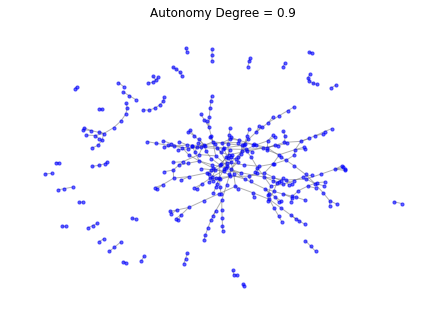

Number of sub-networks: 181
There are 147 isolated nodes


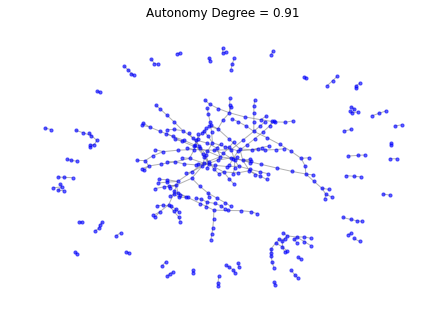

Number of sub-networks: 191
There are 145 isolated nodes


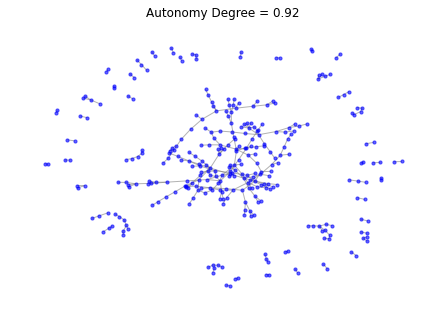

Number of sub-networks: 232
There are 182 isolated nodes


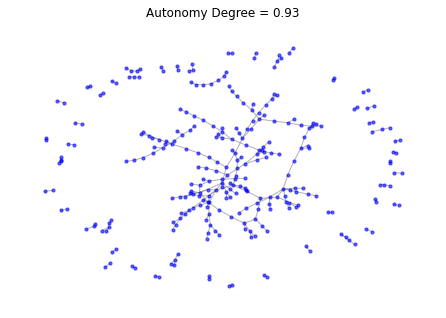

Number of sub-networks: 260
There are 209 isolated nodes


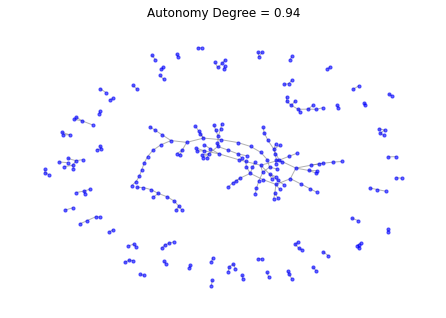

Number of sub-networks: 302
There are 245 isolated nodes


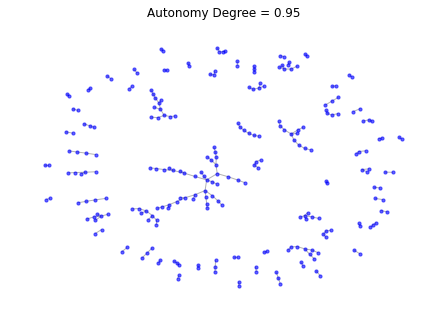

Number of sub-networks: 319
There are 251 isolated nodes


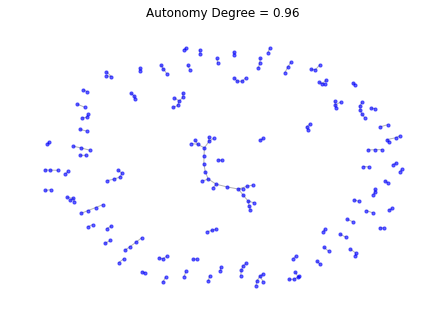

Number of sub-networks: 361
There are 287 isolated nodes


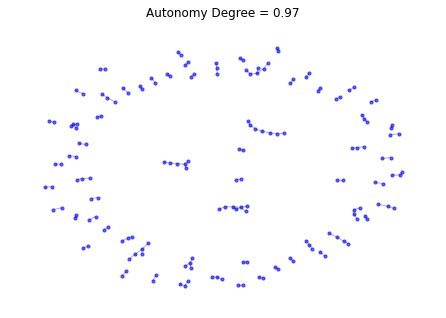

Number of sub-networks: 396
There are 330 isolated nodes


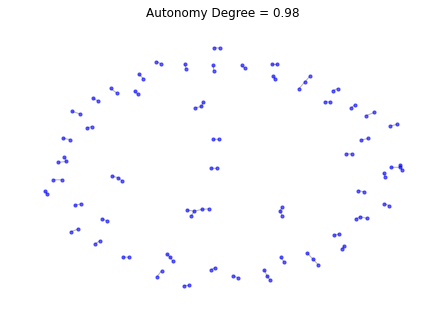

Number of sub-networks: 436
There are 384 isolated nodes


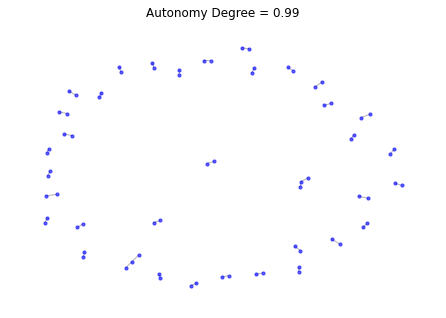

Number of sub-networks: 462
There are 426 isolated nodes


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(100)
# Step 1: Config
num_nodes = 500
num_neighbors = 7
autonomy_prob_list = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
nodes = range(num_nodes)
node_performance = [np.random.uniform(low=0, high=1) for i in range(num_nodes)]
for autonomy_prob in autonomy_prob_list:
    # Step 2: Build connections for each node
    G = nx.Graph()
    for node in nodes:
        # Randomly select 7 superior nodes (excluding the focal node)
        first_superior_nodes = [index for index, performance in zip(nodes, node_performance) if performance >= node_performance[node]]
        if len(first_superior_nodes) > num_neighbors:
            first_suggested_nodes = random.sample(set(first_superior_nodes) - {node}, num_neighbors)
        else:
            first_suggested_nodes = set(first_superior_nodes) - {node}
        for neighbor in first_suggested_nodes:
            # Check if the neighbor also suggests the focal node
            second_superior_nodes = [index for index, performance in zip(nodes, node_performance) if performance >= node_performance[neighbor]]
            if len(second_superior_nodes) > num_neighbors:
                second_suggested_nodes = random.sample(set(second_superior_nodes) - {neighbor}, num_neighbors)
                if node in random.sample(set(second_suggested_nodes) - {neighbor}, num_neighbors):
                    G.add_edge(node, neighbor)
                else:
                    if np.random.uniform(0, 1) >= autonomy_prob:  # Non-autonomy; Being forced
                        G.add_edge(node, neighbor)
            else:
                second_suggested_nodes = set(second_superior_nodes) - {neighbor}
                if node in second_suggested_nodes:
                    G.add_edge(node, neighbor)
                else:
                    if np.random.uniform(0, 1) >= autonomy_prob:  # Non-autonomy; Being forced
                        G.add_edge(node, neighbor)
    
    # Step 3: Visualize the network with circles representing nodes
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
    plt.title("Autonomy Degree = {0}".format(autonomy_prob))
    plt.show()
    
    # Step 4: Calculate the number of sub-networks
    # Use the original set of nodes to find isolated nodes
    isolated_nodes = list(set(nodes) - set(G.nodes()))
    num_subnetworks = nx.number_connected_components(G) + len(isolated_nodes)
    
    print(f"Number of sub-networks: {num_subnetworks}")
    if isolated_nodes:
        print(f"There are {len(isolated_nodes)} isolated nodes")
    else:
        print("There are no isolated nodes.")

In [3]:
import random

# Generate a list of 6 random numbers from range(1, 49)
random_numbers = random.sample(range(1, 50), 6)

print(random_numbers)


[8, 45, 11, 29, 1, 12]


In [4]:
import random

# Generate a list of 6 random numbers from range(1, 49)
random_numbers = random.sample(range(1, 50), 6)

print(random_numbers)


[34, 35, 23, 1, 33, 41]


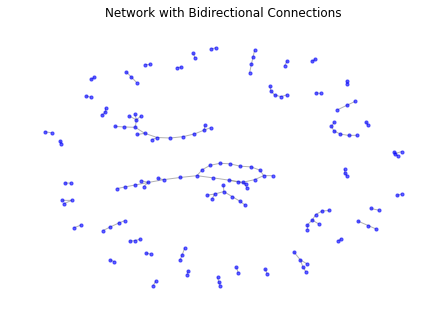

Number of sub-networks: 44
There are 139 isolated nodes: [1, 8, 10, 11, 14, 18, 20, 21, 22, 27, 28, 29, 30, 32, 35, 36, 37, 38, 39, 42, 43, 44, 45, 48, 52, 57, 58, 59, 61, 62, 64, 66, 67, 69, 72, 84, 85, 86, 89, 92, 98, 101, 102, 103, 105, 108, 109, 112, 116, 117, 119, 120, 125, 126, 129, 135, 138, 139, 141, 143, 144, 145, 147, 149, 150, 154, 155, 158, 160, 163, 164, 165, 166, 167, 171, 172, 174, 177, 179, 182, 184, 185, 189, 190, 195, 196, 197, 199, 200, 201, 203, 204, 205, 209, 211, 212, 215, 217, 221, 223, 224, 225, 227, 229, 230, 233, 235, 236, 237, 239, 242, 243, 245, 246, 247, 249, 250, 251, 252, 255, 257, 259, 260, 261, 262, 268, 269, 272, 274, 277, 283, 287, 288, 292, 293, 294, 295, 296, 297]
Overall average distance: 1.4037683884742709


In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Generate 300 nodes
num_nodes = 300
nodes = range(num_nodes)

# Step 2: Build connections for each node
G = nx.Graph()

for node in nodes:
    # Randomly select 7 nodes (excluding the focal node)
    suggested_nodes = random.sample(set(nodes) - {node}, 11)
    
    for neighbor in suggested_nodes:
        # Check if the neighbor also suggests the focal node
        if node in random.sample(set(nodes) - {neighbor}, 11):
            G.add_edge(node, neighbor)

# Step 3: Visualize the network
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.6)
plt.title("Network with Bidirectional Connections")
plt.show()
    
# Step 4: Calculate the number of sub-networks
num_subnetworks = nx.number_connected_components(G)

# Use the original set of nodes to find isolated nodes
isolated_nodes = list(set(nodes) - set(G.nodes()))

print(f"Number of sub-networks: {num_subnetworks}")
if isolated_nodes:
    print(f"There are {len(isolated_nodes)} isolated nodes: {isolated_nodes}")
else:
    print("There are no isolated nodes.")
    
# Step 5: Calculate the average distance for each sub-network
connected_components = list(nx.connected_components(G))
average_distances = []
for component in connected_components:
    subgraph = G.subgraph(component)
    if len(subgraph) > 1:
        average_distance = nx.average_shortest_path_length(subgraph)
        average_distances.append(average_distance)

# Step 6: Calculate the overall average distance
if average_distances:
    overall_average_distance = np.mean(average_distances)
    print(f"Overall average distance: {overall_average_distance}")
else:
    print("The graph is disconnected.")